# Test 4 - Comparison vs FM paper: CoinCollector, CookingGame, TreasureHunter

In [ ]:
! tar czf Testing.tar *

In [ ]:
! nvidia-smi

In [1]:
import pickle
import random

In [2]:
import sys
sys.path.append("../Self-evaluation")

from self_evaluation import play, LLMAgentSelfEvaluate

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

# Game generation

Idea:
- two models used: no-think and 10-think
- different difficulty levels: 6 for coin collector, ~5 for common sense,~ 5 for cooking, 8 for treasure hunter
- 5 seeds per case (vs 40 in FM paper), 1 episode per seed
- total episodes: 240 (190 without commonsense)

In [3]:
levels = {"coin_collector": 17, "cooking": 9, "treasure_hunter": 29}
seeds = range(1,11)

In [ ]:
import subprocess

for game in levels.keys():
    if game == "cooking":
        continue # we generate cooking in another way
    for level in range(1, levels[game]+1):
        for seed in seeds:
            subprocess.run(["tw-make", f"tw-{game}", "--level", f"{level}", "--seed", f"{seed}", "--output", f"games/{game}/level{level}-seed{seed}.z8"]) 

In [ ]:
# redo coin collector level 8 with more seeds
for seed in seeds:
    subprocess.run(["tw-make", "tw-coin_collector", "--level", "8", "--seed", f"{seed}", "--output", f"games/coin_collector/level8-seed{seed}.z8"])

# play immediately
for n in n_think_indices:
    results_all_seeds = []
    for seed in seeds:
        results = play(LLMAgentSelfEvaluate(selfeval_turns=n, verbose=False),
                f"games/coin_collector/level8-seed{seed}.z8", max_steps=max_steps, n_episodes=n_episodes)
        results_all_seeds.append(results[0]) # only one episode
    with open(f"./Testing 4/{n}think_coin_collector_level8", "wb") as f:
        pickle.dump(results_all_seeds, f)
        print("Data pickled.")
        f.close()

In [ ]:
# treasure hunter levels 16-30

import subprocess

for game in levels.keys():
    if game == "cooking" or game == "coin_collector":
        continue # we generate in another way
    for level in range(16, 30):
        for seed in seeds:
            subprocess.run(["tw-make", f"tw-{game}", "--level", f"{level}", "--seed", f"{seed}", "--output", f"games/{game}/level{level}-seed{seed}.z8"]) 

In [ ]:
!tw-make tw-treasure_hunter --seed 11 --level 20 --output games/treasure_hunter/level20-seed3.z8

In [ ]:
!tw-make tw-treasure_hunter --seed 13 --level 9 --output games/treasure_hunter/level9-seed8.z8
!tw-make tw-treasure_hunter --seed 15 --level 9 --output games/treasure_hunter/level9-seed9.z8
!tw-make tw-treasure_hunter --seed 13 --level 10 --output games/treasure_hunter/level10-seed8.z8
!tw-make tw-treasure_hunter --seed 15 --level 10 --output games/treasure_hunter/level10-seed9.z8

In [ ]:
# coin collector levels 16-20 seed 10

import subprocess
for game in levels.keys():
    if game == "cooking" or game == "treasure_hunter":
        continue
    for level in range(16, 21):
        for seed in [10]:
            subprocess.run(["tw-make", f"tw-{game}", "--level", f"{level}", "--seed", f"{seed}", "--output", f"games/{game}/level{level}-seed{seed}.z8"])

#### Cooking

In [ ]:
!tw-make tw-cooking --seed 1 --go 1 --take 1 --recipe 1 --cut --cook --output games/cooking/level1-seed1.z8
!tw-make tw-cooking --seed 2 --go 1 --take 1 --recipe 1 --cut --cook --output games/cooking/level1-seed2.z8
!tw-make tw-cooking --seed 3 --go 1 --take 1 --recipe 1 --cut --cook --output games/cooking/level1-seed3.z8
!tw-make tw-cooking --seed 4 --go 1 --take 1 --recipe 1 --cut --cook --output games/cooking/level1-seed4.z8
!tw-make tw-cooking --seed 5 --go 1 --take 1 --recipe 1 --cut --cook --output games/cooking/level1-seed5.z8
!tw-make tw-cooking --seed 6 --go 1 --take 1 --recipe 1 --cut --cook --output games/cooking/level1-seed6.z8
!tw-make tw-cooking --seed 7 --go 1 --take 1 --recipe 1 --cut --cook --output games/cooking/level1-seed7.z8
!tw-make tw-cooking --seed 8 --go 1 --take 1 --recipe 1 --cut --cook --output games/cooking/level1-seed8.z8
!tw-make tw-cooking --seed 9 --go 1 --take 1 --recipe 1 --cut --cook --output games/cooking/level1-seed9.z8
!tw-make tw-cooking --seed 10 --go 1 --take 1 --recipe 1 --cut --cook --output games/cooking/level1-seed10.z8

!tw-make tw-cooking --seed 1 --go 1 --take 2 --recipe 2 --cut --cook --output games/cooking/level2-seed1.z8
!tw-make tw-cooking --seed 2 --go 1 --take 2 --recipe 2 --cut --cook --output games/cooking/level2-seed2.z8
!tw-make tw-cooking --seed 3 --go 1 --take 2 --recipe 2 --cut --cook --output games/cooking/level2-seed3.z8
!tw-make tw-cooking --seed 4 --go 1 --take 2 --recipe 2 --cut --cook --output games/cooking/level2-seed4.z8
!tw-make tw-cooking --seed 5 --go 1 --take 2 --recipe 2 --cut --cook --output games/cooking/level2-seed5.z8
!tw-make tw-cooking --seed 6 --go 1 --take 2 --recipe 2 --cut --cook --output games/cooking/level2-seed6.z8
!tw-make tw-cooking --seed 7 --go 1 --take 2 --recipe 2 --cut --cook --output games/cooking/level2-seed7.z8
!tw-make tw-cooking --seed 8 --go 1 --take 2 --recipe 2 --cut --cook --output games/cooking/level2-seed8.z8
!tw-make tw-cooking --seed 9 --go 1 --take 2 --recipe 2 --cut --cook --output games/cooking/level2-seed9.z8
!tw-make tw-cooking --seed 10 --go 1 --take 2 --recipe 2 --cut --cook --output games/cooking/level2-seed10.z8

!tw-make tw-cooking --seed 1 --go 1 --take 3 --recipe 3 --cut --cook --output games/cooking/level3-seed1.z8
!tw-make tw-cooking --seed 2 --go 1 --take 3 --recipe 3 --cut --cook --output games/cooking/level3-seed2.z8
!tw-make tw-cooking --seed 3 --go 1 --take 3 --recipe 3 --cut --cook --output games/cooking/level3-seed3.z8
!tw-make tw-cooking --seed 4 --go 1 --take 3 --recipe 3 --cut --cook --output games/cooking/level3-seed4.z8
!tw-make tw-cooking --seed 5 --go 1 --take 3 --recipe 3 --cut --cook --output games/cooking/level3-seed5.z8
!tw-make tw-cooking --seed 6 --go 1 --take 3 --recipe 3 --cut --cook --output games/cooking/level3-seed6.z8
!tw-make tw-cooking --seed 7 --go 1 --take 3 --recipe 3 --cut --cook --output games/cooking/level3-seed7.z8
!tw-make tw-cooking --seed 8 --go 1 --take 3 --recipe 3 --cut --cook --output games/cooking/level3-seed8.z8
!tw-make tw-cooking --seed 9 --go 1 --take 3 --recipe 3 --cut --cook --output games/cooking/level3-seed9.z8
!tw-make tw-cooking --seed 10 --go 1 --take 3 --recipe 3 --cut --cook --output games/cooking/level3-seed10.z8

!tw-make tw-cooking --seed 1 --go 6 --take 1 --recipe 1 --cut --cook --output games/cooking/level4-seed1.z8
!tw-make tw-cooking --seed 2 --go 6 --take 1 --recipe 1 --cut --cook --output games/cooking/level4-seed2.z8
!tw-make tw-cooking --seed 3 --go 6 --take 1 --recipe 1 --cut --cook --output games/cooking/level4-seed3.z8
!tw-make tw-cooking --seed 4 --go 6 --take 1 --recipe 1 --cut --cook --output games/cooking/level4-seed4.z8
!tw-make tw-cooking --seed 5 --go 6 --take 1 --recipe 1 --cut --cook --output games/cooking/level4-seed5.z8
!tw-make tw-cooking --seed 6 --go 6 --take 1 --recipe 1 --cut --cook --output games/cooking/level4-seed6.z8
!tw-make tw-cooking --seed 7 --go 6 --take 1 --recipe 1 --cut --cook --output games/cooking/level4-seed7.z8
!tw-make tw-cooking --seed 8 --go 6 --take 1 --recipe 1 --cut --cook --output games/cooking/level4-seed8.z8
!tw-make tw-cooking --seed 9 --go 6 --take 1 --recipe 1 --cut --cook --output games/cooking/level4-seed9.z8
!tw-make tw-cooking --seed 10 --go 6 --take 1 --recipe 1 --cut --cook --output games/cooking/level4-seed10.z8

!tw-make tw-cooking --seed 1 --go 6 --take 2 --recipe 2 --cut --cook --output games/cooking/level5-seed1.z8
!tw-make tw-cooking --seed 2 --go 6 --take 2 --recipe 2 --cut --cook --output games/cooking/level5-seed2.z8
!tw-make tw-cooking --seed 3 --go 6 --take 2 --recipe 2 --cut --cook --output games/cooking/level5-seed3.z8
!tw-make tw-cooking --seed 4 --go 6 --take 2 --recipe 2 --cut --cook --output games/cooking/level5-seed4.z8
!tw-make tw-cooking --seed 5 --go 6 --take 2 --recipe 2 --cut --cook --output games/cooking/level5-seed5.z8
!tw-make tw-cooking --seed 6 --go 6 --take 2 --recipe 2 --cut --cook --output games/cooking/level5-seed6.z8
!tw-make tw-cooking --seed 7 --go 6 --take 2 --recipe 2 --cut --cook --output games/cooking/level5-seed7.z8
!tw-make tw-cooking --seed 8 --go 6 --take 2 --recipe 2 --cut --cook --output games/cooking/level5-seed8.z8
!tw-make tw-cooking --seed 9 --go 6 --take 2 --recipe 2 --cut --cook --output games/cooking/level5-seed9.z8
!tw-make tw-cooking --seed 10 --go 6 --take 2 --recipe 2 --cut --cook --output games/cooking/level5-seed10.z8

In [ ]:
!tw-make tw-cooking --seed 1 --go 6 --take 3 --recipe 3 --cut --cook --output games/cooking/level6-seed1.z8
!tw-make tw-cooking --seed 2 --go 6 --take 3 --recipe 3 --cut --cook --output games/cooking/level6-seed2.z8
!tw-make tw-cooking --seed 3 --go 6 --take 3 --recipe 3 --cut --cook --output games/cooking/level6-seed3.z8
!tw-make tw-cooking --seed 4 --go 6 --take 3 --recipe 3 --cut --cook --output games/cooking/level6-seed4.z8
!tw-make tw-cooking --seed 5 --go 6 --take 3 --recipe 3 --cut --cook --output games/cooking/level6-seed5.z8
!tw-make tw-cooking --seed 6 --go 6 --take 3 --recipe 3 --cut --cook --output games/cooking/level6-seed6.z8
!tw-make tw-cooking --seed 7 --go 6 --take 3 --recipe 3 --cut --cook --output games/cooking/level6-seed7.z8
!tw-make tw-cooking --seed 8 --go 6 --take 3 --recipe 3 --cut --cook --output games/cooking/level6-seed8.z8
!tw-make tw-cooking --seed 9 --go 6 --take 3 --recipe 3 --cut --cook --output games/cooking/level6-seed9.z8
!tw-make tw-cooking --seed 10 --go 6 --take 3 --recipe 3 --cut --cook --output games/cooking/level6-seed10.z8

In [ ]:
!tw-make tw-cooking --seed 1 --go 6 --take 3 --recipe 3 --cut --cook --open --output games/cooking/level7-seed1.z8
!tw-make tw-cooking --seed 2 --go 6 --take 3 --recipe 3 --cut --cook --open --output games/cooking/level7-seed2.z8
!tw-make tw-cooking --seed 3 --go 6 --take 3 --recipe 3 --cut --cook --open --output games/cooking/level7-seed3.z8
!tw-make tw-cooking --seed 4 --go 6 --take 3 --recipe 3 --cut --cook --open --output games/cooking/level7-seed4.z8
!tw-make tw-cooking --seed 5 --go 6 --take 3 --recipe 3 --cut --cook --open --output games/cooking/level7-seed5.z8
!tw-make tw-cooking --seed 6 --go 6 --take 3 --recipe 3 --cut --cook --open --output games/cooking/level7-seed6.z8
!tw-make tw-cooking --seed 7 --go 6 --take 3 --recipe 3 --cut --cook --open --output games/cooking/level7-seed7.z8
!tw-make tw-cooking --seed 8 --go 6 --take 3 --recipe 3 --cut --cook --open --output games/cooking/level7-seed8.z8
!tw-make tw-cooking --seed 9 --go 6 --take 3 --recipe 3 --cut --cook --open --output games/cooking/level7-seed9.z8
!tw-make tw-cooking --seed 10 --go 6 --take 3 --recipe 3 --cut --cook --open --output games/cooking/level7-seed10.z8

In [ ]:
!tw-make tw-cooking --seed 1 --go 6 --take 3 --recipe 3 --cut --cook --open --drop --output games/cooking/level8-seed1.z8
!tw-make tw-cooking --seed 2 --go 6 --take 3 --recipe 3 --cut --cook --open --drop --output games/cooking/level8-seed2.z8
!tw-make tw-cooking --seed 3 --go 6 --take 3 --recipe 3 --cut --cook --open --drop --output games/cooking/level8-seed3.z8
!tw-make tw-cooking --seed 4 --go 6 --take 3 --recipe 3 --cut --cook --open --drop --output games/cooking/level8-seed4.z8
!tw-make tw-cooking --seed 5 --go 6 --take 3 --recipe 3 --cut --cook --open --drop --output games/cooking/level8-seed5.z8
!tw-make tw-cooking --seed 6 --go 6 --take 3 --recipe 3 --cut --cook --open --drop --output games/cooking/level8-seed6.z8
!tw-make tw-cooking --seed 7 --go 6 --take 3 --recipe 3 --cut --cook --open --drop --output games/cooking/level8-seed7.z8
!tw-make tw-cooking --seed 8 --go 6 --take 3 --recipe 3 --cut --cook --open --drop --output games/cooking/level8-seed8.z8
!tw-make tw-cooking --seed 9 --go 6 --take 3 --recipe 3 --cut --cook --open --drop --output games/cooking/level8-seed9.z8
!tw-make tw-cooking --seed 10 --go 6 --take 3 --recipe 3 --cut --cook --open --drop --output games/cooking/level8-seed10.z8

In [ ]:
!tw-make tw-cooking --seed 1 --go 9 --take 3 --recipe 3 --cut --cook --open --drop --output games/cooking/level9-seed1.z8
!tw-make tw-cooking --seed 2 --go 9 --take 3 --recipe 3 --cut --cook --open --drop --output games/cooking/level9-seed2.z8
!tw-make tw-cooking --seed 3 --go 9 --take 3 --recipe 3 --cut --cook --open --drop --output games/cooking/level9-seed3.z8
!tw-make tw-cooking --seed 4 --go 9 --take 3 --recipe 3 --cut --cook --open --drop --output games/cooking/level9-seed4.z8
!tw-make tw-cooking --seed 5 --go 9 --take 3 --recipe 3 --cut --cook --open --drop --output games/cooking/level9-seed5.z8
!tw-make tw-cooking --seed 6 --go 9 --take 3 --recipe 3 --cut --cook --open --drop --output games/cooking/level9-seed6.z8
!tw-make tw-cooking --seed 7 --go 9 --take 3 --recipe 3 --cut --cook --open --drop --output games/cooking/level9-seed7.z8
!tw-make tw-cooking --seed 8 --go 9 --take 3 --recipe 3 --cut --cook --open --drop --output games/cooking/level9-seed8.z8
!tw-make tw-cooking --seed 9 --go 9 --take 3 --recipe 3 --cut --cook --open --drop --output games/cooking/level9-seed9.z8
!tw-make tw-cooking --seed 10 --go 9 --take 3 --recipe 3 --cut --cook --open --drop --output games/cooking/level9-seed10.z8

## Game running

In [4]:
n_think_indices = [0, 10]
n_episodes = 1
max_steps = 100

In [ ]:
for n in n_think_indices:
    for game in levels.keys():
        if n == 0 and (game == "coin_collector" or game == "cooking"):
            continue # skip runs we've already done
        for level in range(1, levels[game]+1):
            results_all_seeds = []
            for seed in seeds:
                results = play(LLMAgentSelfEvaluate(selfeval_turns=n, verbose=False),
                               f"games/{game}/level{level}-seed{seed}.z8", max_steps=max_steps, n_episodes=n_episodes)
                results_all_seeds.append(results[0]) # only one episode
            with open(f"./Testing 4/{n}think_{game}_level{level}.pickle", "wb") as f:
                pickle.dump(results_all_seeds, f) # so we dump already with grouping by seed!!
                print("Data pickled.")
                f.close()

In [ ]:
# VERBOSE PLAYS

play(LLMAgentSelfEvaluate(selfeval_turns=5, verbose=True, log="logs/cooking/level1-seed1.log"),
     path="games/cooking/level1-seed1.z8", max_steps=max_steps, n_episodes=n_episodes)

### Extra runs

In [ ]:
# cooking levels 8-9

for n in n_think_indices:
    for game in levels.keys():
        for level in range(1, levels[game]+1):
            if game != "cooking" or level <= 7:
                continue # skip runs we've already done
            results_all_seeds = []
            for seed in seeds:
                results = play(LLMAgentSelfEvaluate(selfeval_turns=n, verbose=False),
                               f"games/{game}/level{level}-seed{seed}.z8", max_steps=max_steps, n_episodes=n_episodes)
                results_all_seeds.append(results[0]) # only one episode
            with open(f"./Testing 4/{n}think_{game}_level{level}.pickle", "wb") as f:
                pickle.dump(results_all_seeds, f) # so we dump already with grouping by seed!!
                print("Data pickled.")
                f.close()

# Data aggregation for visualization

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bootstrap

In [43]:
max_scores_cooking = [5, 8, 11, 5, 8, 11, 11, 11, 11]

In [ ]:
coin_nothink = []
coin_nothink_ci = []
coin_10think = []
coin_10think_ci = []
treasure_nothink = []
treasure_nothink_ci = []
treasure_10think = []
treasure_10think_ci = []
cooking_nothink = []
cooking_nothink_ci = []
cooking_10think = []
cooking_10think_ci = []

final_arrays = {"coin_collector": {0: (coin_nothink, coin_nothink_ci), 10: (coin_10think, coin_10think_ci)},
                "treasure_hunter": {0: (treasure_nothink, treasure_nothink_ci), 10: (treasure_10think, treasure_10think_ci)},
                "cooking": {0: (cooking_nothink, cooking_nothink_ci), 10: (cooking_10think, cooking_10think_ci)}}

for n in n_think_indices:
    for game in levels.keys():
        for level in range(1, levels[game]+1):
            results_all_seeds = []
            with open(f"./Testing 4/{n}think_{game}_level{level}.pickle", "rb") as f:
                results_all_seeds = pickle.load(f)
                f.close()
            final_scores = [run[-1][1] for run in results_all_seeds] # last step, score
            if game == "cooking":
                final_scores = np.array(final_scores) / max_scores_cooking[level - 1] # we need to normalize the results of cooking
            avg_final_score = np.mean(final_scores)
            bootstrap_results = bootstrap(data=(final_scores,), 
                                statistic=np.mean,
                                method="basic",
                                n_resamples=1000,
                                confidence_level=0.9)
            final_arrays[game][n][0].append(avg_final_score)
            final_arrays[game][n][1].append((bootstrap_results.confidence_interval.high, bootstrap_results.confidence_interval.low))

# Visualization

In [27]:
figsize=(12,20)

In [28]:
ylims = {"coin_collector": (0,1),
         "cooking": (0, 0.5),
         "treasure_hunter": (0.1, 1)}

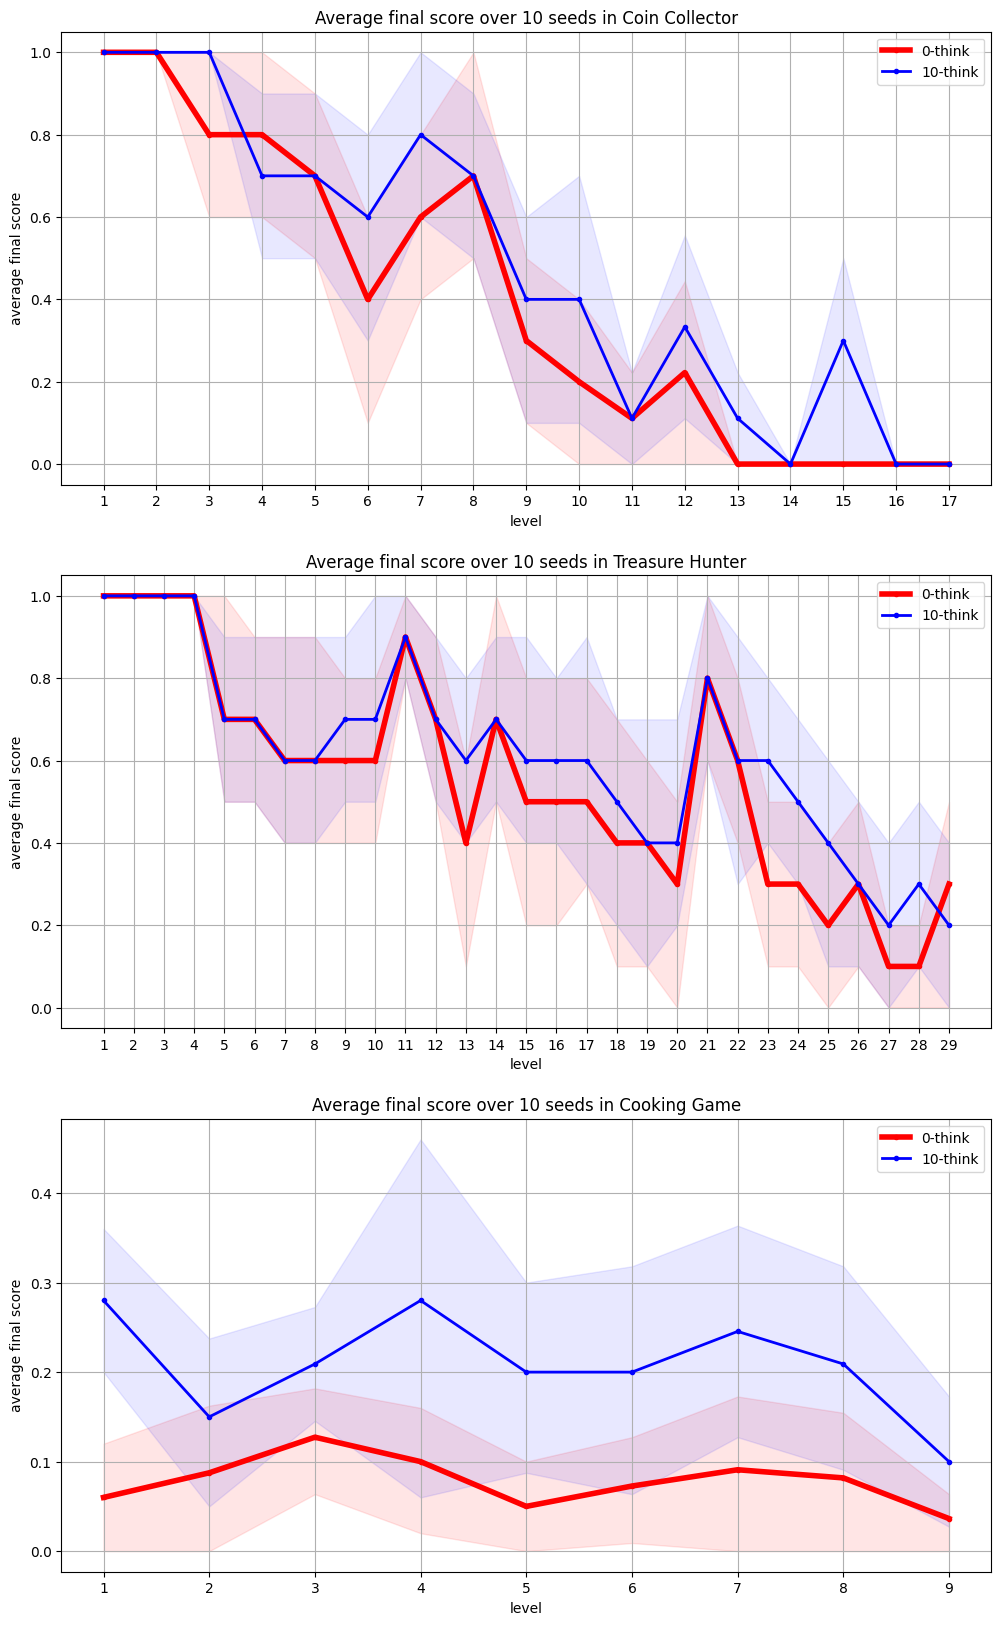

In [46]:
fig, axes = plt.subplots(3,1, figsize=figsize)
prettified_names = {"coin_collector": "Coin Collector", "treasure_hunter": "Treasure Hunter", "cooking": "Cooking Game"}

for i, game in enumerate(final_arrays.keys()):
    ax = axes[i]
    x = list(range(1, levels[game]+1))
    y_0, y_0_ci = final_arrays[game][0]
    y_10, y_10_ci = final_arrays[game][10]

    ax.fill_between(x,
                    np.clip([i[0] for i in y_0_ci], 0, 1),
                    np.clip([i[1] for i in y_0_ci], 0, 1),
                    alpha=0.1, color="red")
    ax.fill_between(x,
                    np.clip([i[0] for i in y_10_ci], 0, 1),
                    np.clip([i[1] for i in y_10_ci], 0, 1),
                    alpha=0.09, color="blue")

    ax.plot(x, y_0, label="0-think", marker=".", linestyle="-", color="red", linewidth=4)
    ax.plot(x, y_10, label="10-think", marker=".", linestyle="-", color="blue", linewidth=2)
    
    ax.set_title(f"Average final score over 10 seeds in {prettified_names[game]}")
    ax.set_xlabel('level')
    ax.set_ylabel('average final score')
    ax.legend()

    ax.set_xticks(x)
    # ax.set_ylim(ylims[game][0], ylims[game][1])
    ax.grid()

plt.show()